In [34]:
%load_ext autoreload
%autoreload 2
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils import *
from scipy.interpolate import CubicSpline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
extracted_eyes = get_eyes('sample_3.jpg')
cx,cy = get_center(extracted_eyes)
cx,cy 

(208, 158)

#### measurements 

- sample_2.jpg , MRD1 = 4mm 
- sample_3.jpg , MRD1 = 4mm
- sample_4.jpg , MRD1 = 1mm
- sample_5.jpg , MRD1 = 3.5mm 

#### px to mm
- 1 px = 0.264583 mm

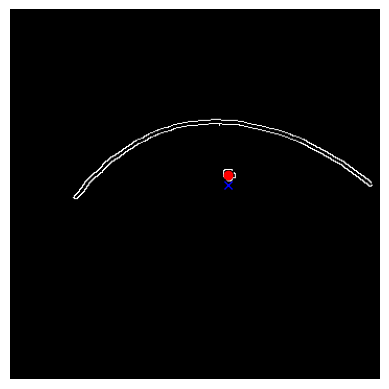

In [14]:
edges = cv2.Canny(extracted_eyes,450,600)
max_y = edges.shape[0]
plt.imshow(edges,cmap='gray')
plt.axis('off')
# mark cx,cy on the image
plt.plot(cx,cy,'ro')
# as y values increase, the point moves downwards on the image plot 
plt.plot(cx,cy+10,'bx')
plt.show()

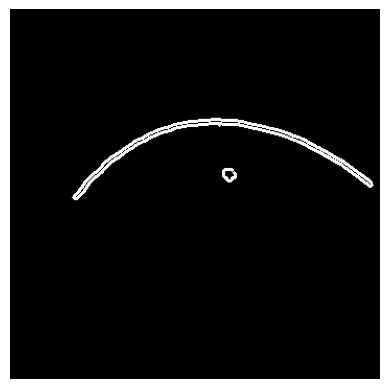

In [15]:

kernel = make_circular_kernel((3,3),1)
edges = cv2.dilate(edges,kernel,iterations=1) 
plt.imshow(edges,cmap='gray')
plt.axis('off')
plt.show()



In [16]:
# draw contours 
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



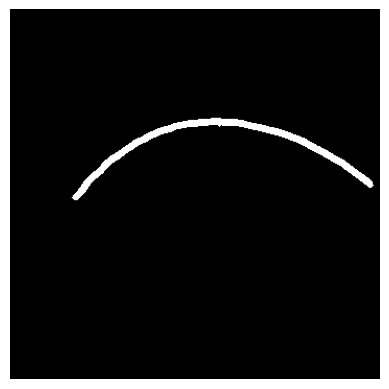

In [17]:
# get the largest contour
largest_contour = max(contours, key=cv2.contourArea)
mask = np.zeros_like(extracted_eyes)
cv2.drawContours(mask, [largest_contour], -1, (255, 255, 255), -1)

plt.imshow(mask,cmap='gray')
plt.axis('off')
plt.show()



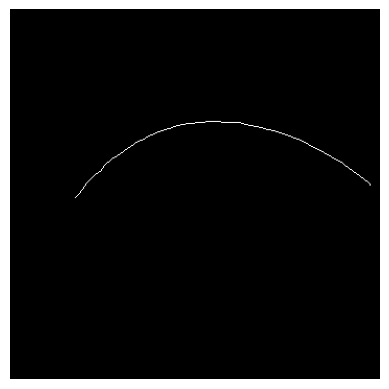

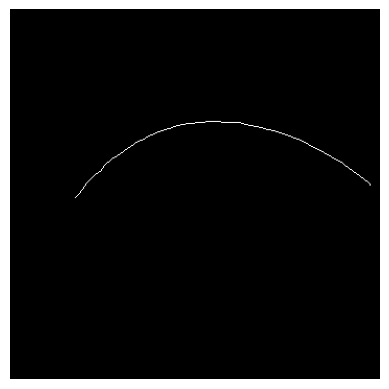

In [18]:

#skeletonize the mask
from skimage.morphology import skeletonize

skeleton = skeletonize(mask)
plt.imshow(skeleton,cmap='gray')
plt.axis('off')
plt.show()
skeleton=skeleton.astype(np.uint8)
contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
mask = np.zeros_like(extracted_eyes)
cv2.drawContours(mask, [largest_contour], -1, (255, 255, 255), -1)

plt.imshow(mask,cmap='gray')
plt.axis('off')
plt.show()

In [19]:
# apply cubic spline on the largest contour 
x = largest_contour[:,0,0]
y = largest_contour[:,0,1]
points = np.array([x,y]).T
# modify the y to be max_y - y
points[:,1] = max_y - points[:,1]

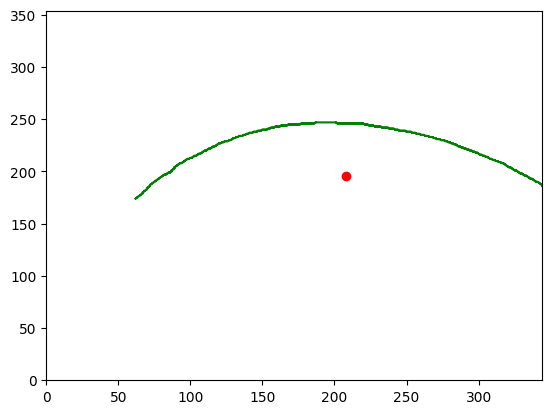

In [20]:
# plot x,y 
# invert the y axis
# plt.plot(x, y)
plt.scatter(cx,max_y-cy,color='red')
plt.plot(points[:,0],points[:,1],color='green')
# show the image from 0 to max_y
plt.ylim(0,max_y)
plt.xlim(0,points[:,0].max())
plt.show()



In [21]:
for i in np.where(abs(points[:,0]-cx)<=5)[0]:
    print(i,x[i],y[i])
    dist = round((points[:,1][i] - cy),2)
    print(np.sqrt(dist) , dist*0.264)

In [ ]:
myarr=['sample_2.jpg','sample_3.jpg','sample_4.jpg','sample_5.jpg']
for sample in myarr:
    getEylidContour(sample,True)

In [98]:
# what's next ? 
# measure our own mrd1 from the picture and compare with the given one (image caption in wp)
# mark (draw) the upper lid contour and get the maximum point (highest y)
# get the distance betweeen the pupil and the highest point of the upper lid contour
# convert px to mm :) 


# after success , 
# GET THE GUI DONE ! like the paper 